In [3]:
import numpy as np

In [4]:
# sigmoid fn
def nonlin(x, deriv = False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))

In [96]:
X = np.array([[0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
y = np.array([[0, .75, .90, 0]])
np.random.seed(10)
# this has three weights to match the input features
# for each row vector
syn0 = 2*np.random.random((3,4)) - 1
# weights of the second hidden network
# this has 4 rows, sa we multiply the observations by a final set of
# weights across the obversations, so this weight updates for each 
# obversation.
syn1 = 2*np.random.random((4,1)) - 1
first_ovbs = []

In [97]:
# iterate through as far as poss
for i in range(0,10000):
    # input layer, 4 obvs and 3 features
    l0 = X
    # hidden layer. we calculate the matrix product of synapse weights
    # and the input values. gives us a 4x4 matrix which we then use the sigmoid fn
    # to mult by the next layer of weights
    # this will be a 4x4 by 4x1, this gives a final 4x1 output matrix 
    l1 = nonlin(np.dot(l0,syn0))
    l2 = nonlin(np.dot(l1,syn1))
    # this should converge to 1 (y value)
    first_ovbs.append(l2[0][0])
    # find error of our predictions
    l2_error = y.T - l2
    # find out where we are on the sigmoid function and what the slope is at that point
    # given we only look at the slope, then if it is at either side of the 
    # sigmoid, the update will be small? i.e. if we are v incorrect 
    # then we never get to a good solution?
    l2_delta = l2_error*nonlin(l2, deriv = True)
    # we also need to find out the update needed to l1
    l1_error = l2_delta.dot(syn1.T)
    # get the update needed
    l1_delta = l1_error*nonlin(l1, deriv = True)
    # update the weights as needed
    # here we adjust the weights of the synapse by the input values and
    # the slope of the direction from the sigmoid function
    syn0 += np.dot(l0.T, l1_delta) 
    syn1 += np.dot(l1.T, l2_delta)
    i += 1


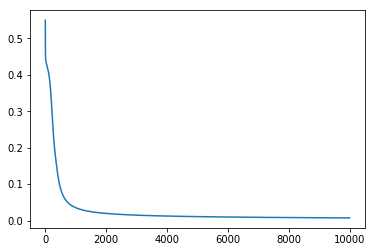

In [98]:
from matplotlib import pyplot as plt
plt.plot(first_ovbs)
plt.show()
#np.dot(X,syn0)

In [99]:
# input layer, 4 obvs and 3 features
l0 = X
# hidden layer. we calculate the matrix product of synapse weights
# and the input values. gives us a 4x1 matrix which we then use the sigmoid fn
# to get to the output layer, this gives a 4x1 matrix 
l1 = nonlin(np.dot(l0,syn0))
l2 = nonlin(np.dot(l1,syn1))


In [100]:
lay1 = nonlin(X.dot(syn0))
lay2 = nonlin(lay1.dot(syn1))
lay2

array([[0.00731246],
       [0.74948426],
       [0.89966541],
       [0.00895585]])

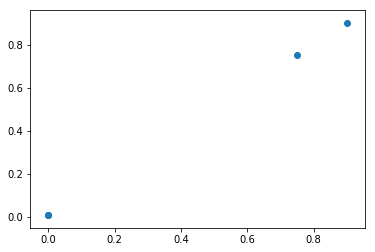

In [102]:
plt.scatter(y,lay2)